# Feature Engineering

### Packages and Dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.stem import PorterStemmer

from textblob import TextBlob
from textblob import Word

stop = stopwords.words('english')

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

### Load Data

In [2]:
main = pd.read_csv('main.csv').drop('Unnamed: 0', 1)

C:\Users\TPCal\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (176,177) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


### Refactor league_25 as the response

In [3]:
replacements = {
    np.nan: 'Not Active',
    0: 'Not Active',
    'ECHL': 'Lower',
    'AHL': 'Lower',
    'USports': 'Lower', # Collegiate
    'NCHL': 'Lower', # Collegiate
    'LHSAM': 'Lower',
    'LHCS': 'Lower',
    'LNAH': 'Lower',
    'CHL': 'Lower',
    'NCHL-MB': 'Lower',
    'NLSHL': 'Lower',
    'SPHL': 'Lower',
    'LHSR': 'Lower',
    'LHSCE': 'Lower',
    'SEMHL': 'Lower',
    'NESHL': 'Lower',
    'WOAA': 'Lower',
    'HHL': 'Lower',
    'CRL': 'Lower',
    'FPHL': 'Lower',
    'Chinook HL': 'Lower',
    'FHL': 'Lower',
    'LHSAAAQ': 'Lower',
    'BSHL': 'Lower',
    'NPHL-Sr.': 'Lower',
    'WMHL': 'Lower',
    'ACHW': 'Lower',
    'GLHL': 'Lower',
    'RHL': 'Lower',
    'ACAC': 'Lower',
    'SVHL': 'Lower',
    'SWHL': 'Lower',
    'BCIHL': 'Lower',
    'QVHL': 'Lower',
    'WCSHL': 'Lower',
    'LHBBF': 'Lower',
    'OHL': 'Lower',
    'BRHL': 'Lower',
    'FCHL': 'Lower',
    'THHL': 'Lower',
    'ACHA II': 'Lower',
    'LHSLF': 'Lower',
    'CIHL': 'Lower',
    'LRH': 'Lower',
    'NSHL-Sr.': 'Lower',
    'LHSEQ': 'Lower',
    'ACH': 'Lower',
    'IHL': 'Lower',
    'MSHL': 'Lower',
    'SASHL': 'Lower',
    'CSHL-Sr.': 'Lower',
    'USHL': 'Lower',
    'OWSHL': 'Lower',
    'LLHL': 'Lower',
    'CWSHL': 'Lower',
    'LHSBEQ': 'Lower',
    'QSCHL': 'Lower',
    'LHSAO': 'Lower',
    'ASHL': 'Lower',
    'NCAA III': 'Lower',
    'THL': 'Lower',
    'AAHL': 'Lower',
    'Notekeu HL': 'Lower',
    'QMJHL': 'Lower',
    'ACHA III': 'Lower',
    'LHSCN': 'Lower',
    'EPHL': 'Lower'
}

main['response'] = main['league_25'].replace(replacements)

### Refactor country as birth_region

In [4]:
regions = {
    'Czech': 'Eastern Europe',
    'Sweden': 'Scandanavia',
    'Germany': 'Western Europe',
    'Slovakia': 'Eastern Europe',
    'Finland': 'Scandanavia',
    'Italy': 'Western Europe',
    'Norway': 'Scandanavia',
    'Switzerland': 'Western Europe',
    'Latvia': 'Eastern Europe',
    'Ukraine': 'Eastern Europe',
    'Denmark': 'Scandanavia',
    'Hungary': 'Eastern Europe',
    'Belarus': 'Eastern Europe',
    'Kazakhstan': 'Eastern Europe',
    'Slovenia': 'Eastern Europe',
    'U': 'Western Europe', # U is United Kingdom (UK)
    'Austria': 'Western Europe',
    'France': 'Western Europe',
    'South': 'Asia',
    'Croatia': 'Eastern Europe',
    'Israel': 'Eastern Europe',
    'Poland': 'Eastern Europe',
    'England': 'Western Europe',
    'Japan': 'Asia',
    'Netherlands': 'Western Europe'
}

main['birth_region'] = main['country'].replace(regions)

### Manage position

In [5]:
positions = {
    'RW/C': 'Forward',
    'C/LW': 'Forward',
    'RW/LW': 'Winger',
    'D/F': 'Mixed',
    'F': 'Forward',
    'LW/D': 'Mixed',
    'C/RW': 'Forward',
    'LW/RW': 'Forward',
    'LW/C': 'Forward',
    'LW/C/D': 'Mixed',
    'D/W': 'Mixed',
    'W/C/D': 'Mixed',
    'W/C': 'Forward',
    'C/W': 'Forward',
    'D/RW': 'Mixed',
    'F/D': 'Mixed',
    'D/LW': 'Mixed',
    'RW/D': 'Mixed',
    'D/C': 'Mixed',
    'C/RW/D': 'Mixed',
    'W/D': 'Mixed',
    'W': 'Forward',
    'C/D': 'Mixed'
}

main['position'] = main['position'].replace(positions)

### Subset and reorder

In [6]:
reorder = ['ep_id',
    'height', 'weight', 'games_played_14', 'goals_14',
    'assists_14', 'penalty_min_14', 'plus_minus_14', 
    'games_played_15', 'goals_15', 'assists_15', 
    'penalty_min_15', 'plus_minus_15', 
    'games_played_16', 'goals_16', 'assists_16', 'penalty_min_16', 
    'plus_minus_16', 'games_played_17', 'goals_17', 
    'assists_17', 'penalty_min_17', 'plus_minus_17', 
    'scout_text', 'birth_region', 'position', 'shoots', 'response'
]

main = main[reorder]

In [7]:
main = main.loc[main['weight'] > 40]

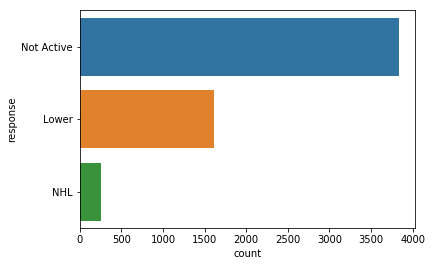

In [8]:
sns.countplot(y=main['response'])

In [9]:
round(main.response.value_counts() / len(main), 2)

Not Active    0.67
Lower         0.28
NHL           0.04
Name: response, dtype: float64

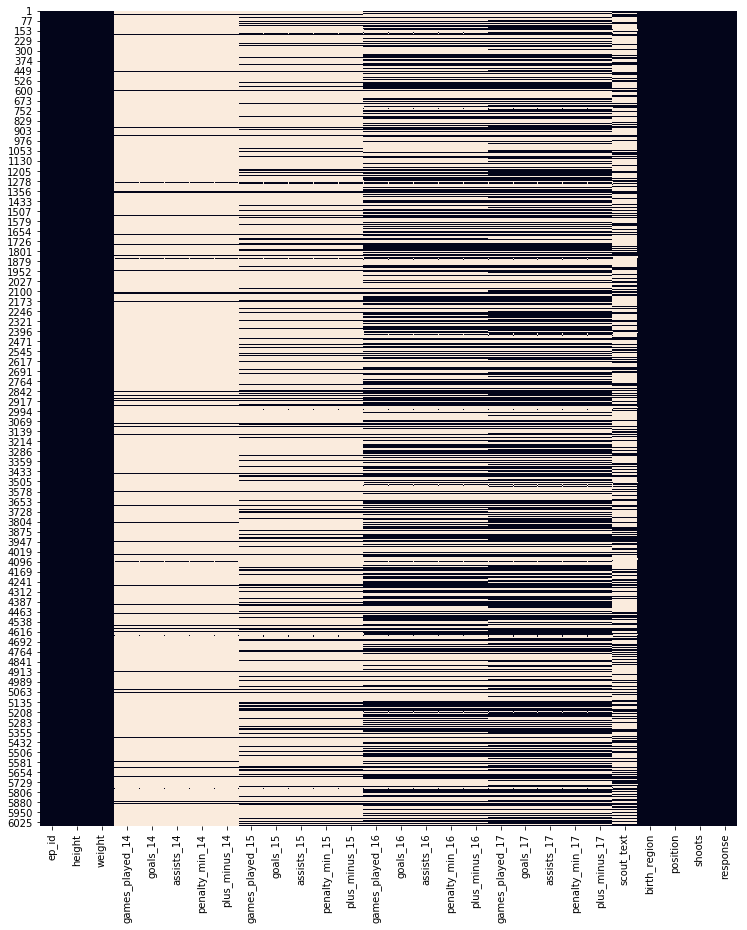

In [10]:
fig, ax = plt.subplots(1, figsize=[12.5, 15])

ax = sns.heatmap(main.isnull(), cbar=False)

plt.show()

### Impute values

In [11]:
main.columns

Index(['ep_id', 'height', 'weight', 'games_played_14', 'goals_14',
       'assists_14', 'penalty_min_14', 'plus_minus_14', 'games_played_15',
       'goals_15', 'assists_15', 'penalty_min_15', 'plus_minus_15',
       'games_played_16', 'goals_16', 'assists_16', 'penalty_min_16',
       'plus_minus_16', 'games_played_17', 'goals_17', 'assists_17',
       'penalty_min_17', 'plus_minus_17', 'scout_text', 'birth_region',
       'position', 'shoots', 'response'],
      dtype='object')

In [12]:
counts = [
    'games_played_14', 'goals_14', 'assists_14', 'penalty_min_14',
    'games_played_15', 'goals_15', 'assists_15', 'penalty_min_15',
    'games_played_16', 'goals_16', 'assists_16', 'penalty_min_16',
    'games_played_17', 'goals_17', 'assists_17', 'penalty_min_17',
]

plus_minuses = [
    'plus_minus_14', 'plus_minus_15', 'plus_minus_16', 'plus_minus_17'
]

In [13]:
main[counts] = main[counts].replace(np.nan, 0)
main[plus_minuses] = main[plus_minuses].replace(np.nan, 0)

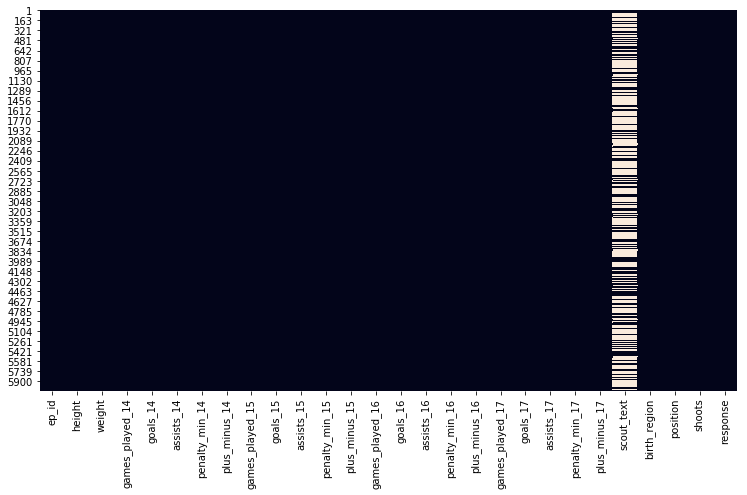

In [14]:
fig, ax = plt.subplots(1, figsize=[12.5, 7])

ax = sns.heatmap(main.isnull(), cbar=False)

plt.show()

## Scouting Reports

In [15]:
partial = pd.read_csv('scout_text_partial_label.csv').drop('Unnamed: 0', 1)
partial = partial[partial['type'] == 'Yes']
response = main[['ep_id', 'response']]
partial = pd.merge(partial, response, on='ep_id', how='left')

In [16]:
partial.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 647 entries, 0 to 646
Data columns (total 4 columns):
ep_id         647 non-null int64
scout_text    647 non-null object
type          647 non-null object
response      647 non-null object
dtypes: int64(1), object(3)
memory usage: 25.3+ KB


In [17]:
def avg_words(sentence):
    words = sentence.split()
    return round((sum(len(word) for word in words)/len(words)), 2)

In [18]:
partial['scout_text'] = partial['scout_text'].apply(lambda x: ' '.join(x.lower() for x in x.split()))
partial['scout_text'] = partial['scout_text'].str.replace('[^\w\s]','')
partial['scout_text'] = partial['scout_text'].apply(lambda x: ' '.join(x for x in x.split() if x not in stop))

In [19]:
partial['word_count'] = partial['scout_text'].apply(lambda x: len(str(x).split(' ')))
partial['char_count'] = partial['scout_text'].str.len()
partial['avg_word'] = partial['scout_text'].apply(lambda x: avg_words(x))
partial['stop_words'] = partial['scout_text'].apply(lambda x: len([x for x in x.split() if x in stop]))
partial['upper'] = partial['scout_text'].apply(lambda x: len([x for x in x.split() if x.isupper()]))

In [20]:
freq = pd.Series(' '.join(partial['scout_text']).split()).value_counts()[:10]

In [21]:
freq = list(freq.index)
partial['scout_text'] = partial['scout_text'].apply(lambda x: ' '.join(x for x in x.split() if x not in freq))

In [22]:
freq = pd.Series(' '.join(partial['scout_text']).split()).value_counts()[-1636:]

In [23]:
freq = list(freq.index)
partial['scout_text'] = partial['scout_text'].apply(lambda x: ' '.join(x for x in x.split() if x not in freq))

In [24]:
#partial['scout_text'] = partial['scout_text'].apply(lambda x: str(TextBlob(x).correct()))

In [25]:
TextBlob(partial['scout_text'][1]).words

WordList(['mcmillan', 'working', 'winger', 'decent', 'hands', 'hockey', 'sense', 'could', 'improve', 'skating', 'speed', 'erik', 'k', 'piri'])

In [26]:
st = PorterStemmer()
partial['scout_text'] = partial['scout_text'].apply(lambda x: ' '.join([st.stem(word) for word in x.split()]))

In [27]:
partial['scout_text'] = partial['scout_text'].apply(lambda x: ' '.join([Word(word).lemmatize() for word in x.split()]))

In [28]:
partial['sentiment'] = partial['scout_text'].apply(lambda x: TextBlob(x).sentiment[0])

In [29]:
partial.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 647 entries, 0 to 646
Data columns (total 10 columns):
ep_id         647 non-null int64
scout_text    647 non-null object
type          647 non-null object
response      647 non-null object
word_count    647 non-null int64
char_count    647 non-null int64
avg_word      647 non-null float64
stop_words    647 non-null int64
upper         647 non-null int64
sentiment     647 non-null float64
dtypes: float64(2), int64(5), object(3)
memory usage: 75.6+ KB


In [30]:
main.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5697 entries, 1 to 6053
Data columns (total 28 columns):
ep_id              5697 non-null int64
height             5697 non-null float64
weight             5697 non-null float64
games_played_14    5697 non-null float64
goals_14           5697 non-null float64
assists_14         5697 non-null float64
penalty_min_14     5697 non-null float64
plus_minus_14      5697 non-null float64
games_played_15    5697 non-null float64
goals_15           5697 non-null float64
assists_15         5697 non-null float64
penalty_min_15     5697 non-null float64
plus_minus_15      5697 non-null float64
games_played_16    5697 non-null float64
goals_16           5697 non-null float64
assists_16         5697 non-null float64
penalty_min_16     5697 non-null float64
plus_minus_16      5697 non-null float64
games_played_17    5697 non-null float64
goals_17           5697 non-null float64
assists_17         5697 non-null float64
penalty_min_17     5697 non-null f

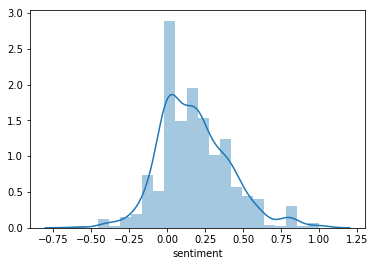

In [31]:
sns.distplot(partial['sentiment'])

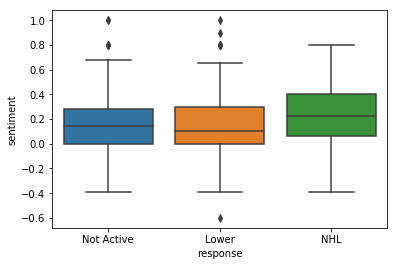

In [32]:
sns.boxplot(partial['response'], partial['sentiment'])

In [33]:
keep = [
    'ep_id', 'type', 'word_count', 'char_count', 'avg_word', 'stop_words', 'upper', 'sentiment'
]

partial = partial[keep]

In [34]:
main = pd.merge(main, partial, on='ep_id', how='left')

In [35]:
main = main[main['type'] == 'Yes']

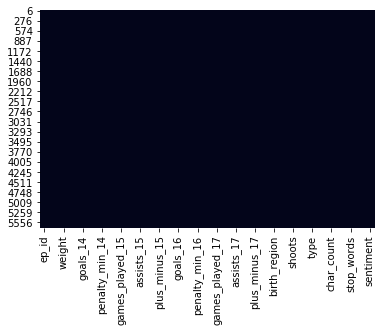

In [36]:
sns.heatmap(main.isnull(), cbar=False)

In [37]:
main.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 647 entries, 6 to 5696
Data columns (total 35 columns):
ep_id              647 non-null int64
height             647 non-null float64
weight             647 non-null float64
games_played_14    647 non-null float64
goals_14           647 non-null float64
assists_14         647 non-null float64
penalty_min_14     647 non-null float64
plus_minus_14      647 non-null float64
games_played_15    647 non-null float64
goals_15           647 non-null float64
assists_15         647 non-null float64
penalty_min_15     647 non-null float64
plus_minus_15      647 non-null float64
games_played_16    647 non-null float64
goals_16           647 non-null float64
assists_16         647 non-null float64
penalty_min_16     647 non-null float64
plus_minus_16      647 non-null float64
games_played_17    647 non-null float64
goals_17           647 non-null float64
assists_17         647 non-null float64
penalty_min_17     647 non-null float64
plus_minus_17   

### Inspect and Export

In [38]:
main_test = main.drop(['ep_id', 'scout_text', 'type'], 1)

In [39]:
main_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 647 entries, 6 to 5696
Data columns (total 32 columns):
height             647 non-null float64
weight             647 non-null float64
games_played_14    647 non-null float64
goals_14           647 non-null float64
assists_14         647 non-null float64
penalty_min_14     647 non-null float64
plus_minus_14      647 non-null float64
games_played_15    647 non-null float64
goals_15           647 non-null float64
assists_15         647 non-null float64
penalty_min_15     647 non-null float64
plus_minus_15      647 non-null float64
games_played_16    647 non-null float64
goals_16           647 non-null float64
assists_16         647 non-null float64
penalty_min_16     647 non-null float64
plus_minus_16      647 non-null float64
games_played_17    647 non-null float64
goals_17           647 non-null float64
assists_17         647 non-null float64
penalty_min_17     647 non-null float64
plus_minus_17      647 non-null float64
birth_region  

In [40]:
#main_test.to_csv('main_test.csv')